In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
acT1_complex = np.load(r"C:\Users\Timothy\Desktop\数学建模相关\二轮\数据集\data_amplitude_T1_complex.npy")

In [3]:
df = pd.DataFrame(acT1_complex)
df445 = df.iloc[445]
df616 = df.iloc[616]
df100 = df.iloc[100]
dflist = [df445,df616,df100]
titlelist = ['445','616','100']

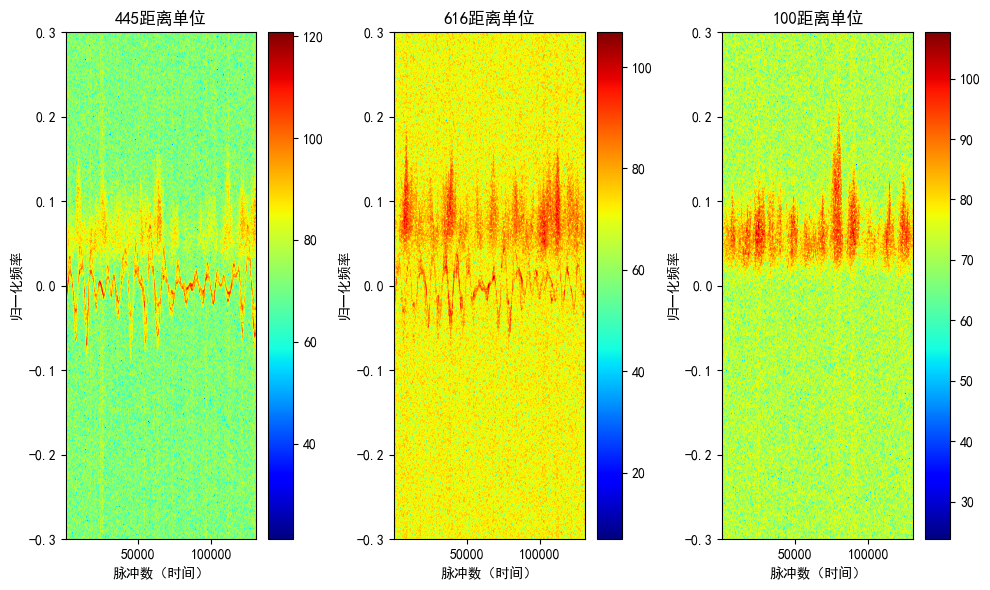

In [5]:
# 绘制频谱图（注意：specgram函数内置了STFT的过程，所以输入数据只包含了dflist中的元素，
# 而不需要如Zxx445这样的STFT结果，因此将STFT部分下移）
# 创建一个 1x3 的子图布局
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
for i in range(3):
    cax = axs[i].specgram(dflist[i], NFFT=1024, Fs=1, noverlap=500, cmap='jet')
    fig.colorbar(cax[3], ax=axs[i])
    axs[i].set_ylim(-0.3, 0.3)
    axs[i].set_title(f'{titlelist[i]}距离单位')
    axs[i].set_xlabel('脉冲数（时间）')
    axs[i].set_ylabel('归一化频率')
plt.tight_layout()
plt.savefig('图/1.png')
plt.show()


445距离单位RI: 2.76171875
445距离单位FV: -0.0078125
616距离单位RI: 41.13671875
616距离单位FV: -0.0703125
100距离单位RI: 59.21484375
100距离单位FV: -0.01171875


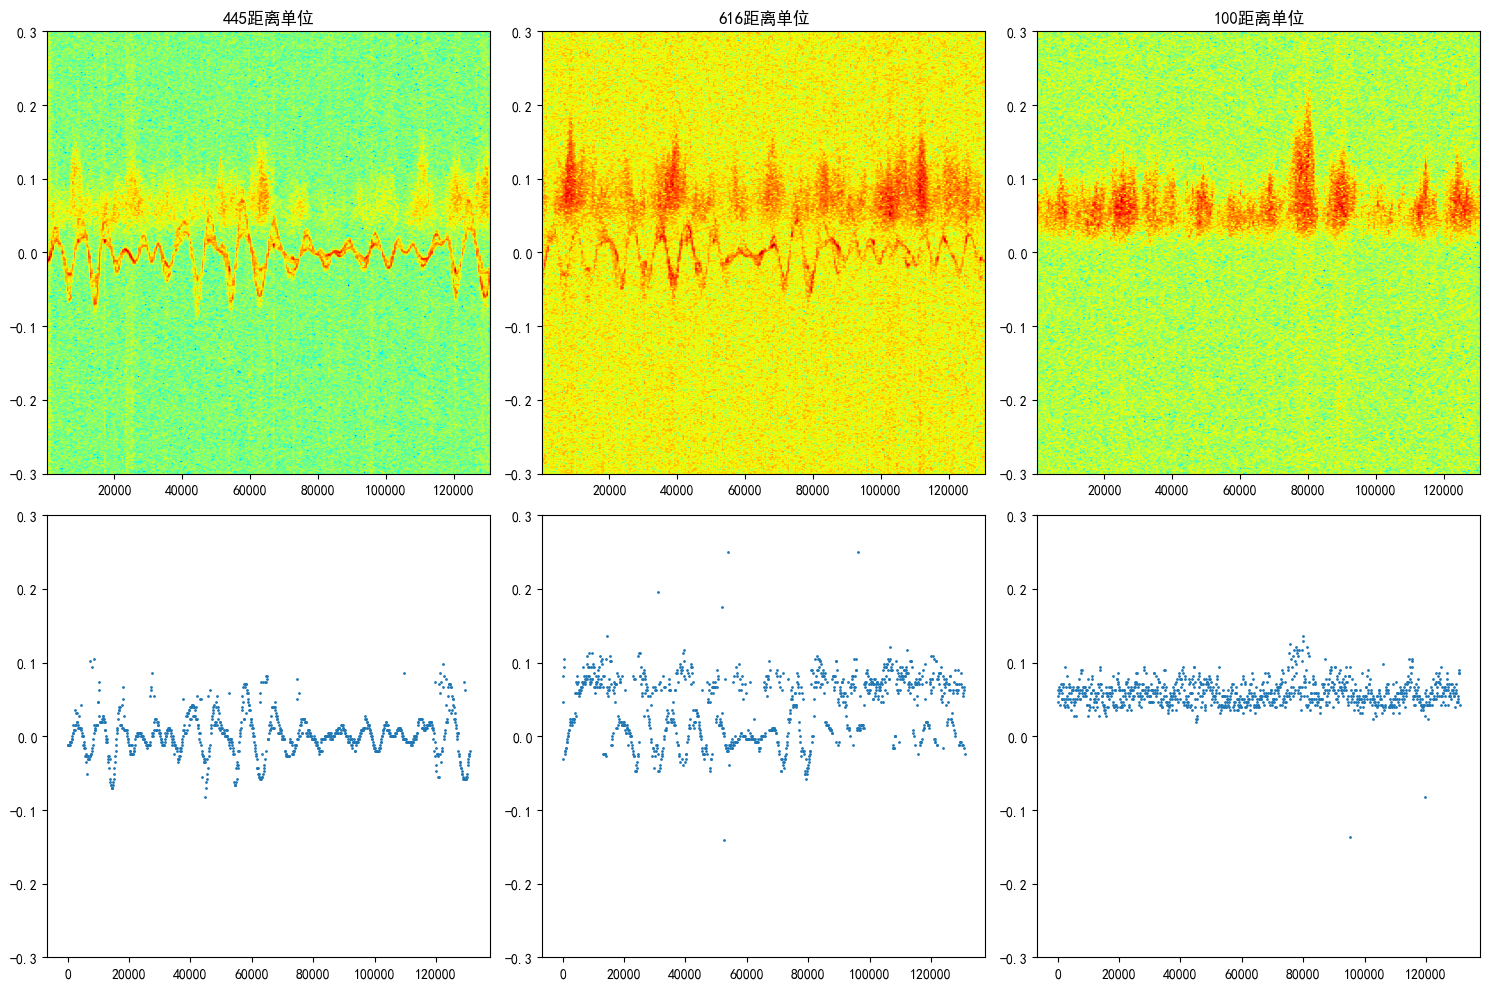

In [6]:
# 短时傅里叶变换（STFT）
f, t, Zxx445 = stft(df445, return_onesided=False)
f, t, Zxx616 = stft(df616, return_onesided=False)
f, t, Zxx100 = stft(df100, return_onesided=False)
Zxx445_max_f = np.argmax(np.abs(Zxx445), axis=0)
Zxx616_max_f = np.argmax(np.abs(Zxx616), axis=0)
Zxx100_max_f = np.argmax(np.abs(Zxx100), axis=0)
# 创建一个 2x3 的子图布局
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 绘制时频谱图
for i, Zxx in enumerate([Zxx445, Zxx616, Zxx100]):
    axs[0, i].specgram(dflist[i], NFFT=1024, Fs=1, noverlap=500, cmap='jet')
    axs[0, i].set_ylim(-0.3, 0.3)
    axs[0, i].set_title(f'{titlelist[i]}距离单位')

# 绘制散点图
for i, Zxx_max_f in enumerate([Zxx445_max_f, Zxx616_max_f, Zxx100_max_f]):
    axs[1, i].scatter(t, f[Zxx_max_f], s=1)
    axs[1, i].set_ylim(-0.3, 0.3)
    print(f"{titlelist[i]}距离单位RI:", sum(f[Zxx_max_f]))
    print(f"{titlelist[i]}距离单位FV:", sum(np.diff(f[Zxx_max_f])))
plt.tight_layout()
plt.savefig('图/2.png')
plt.show()